In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

## Data analysis procedure for one dataset

<Figure size 1000x600 with 0 Axes>

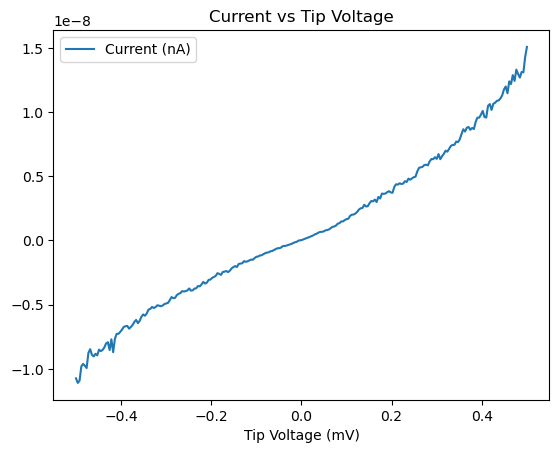

<Figure size 1000x600 with 0 Axes>

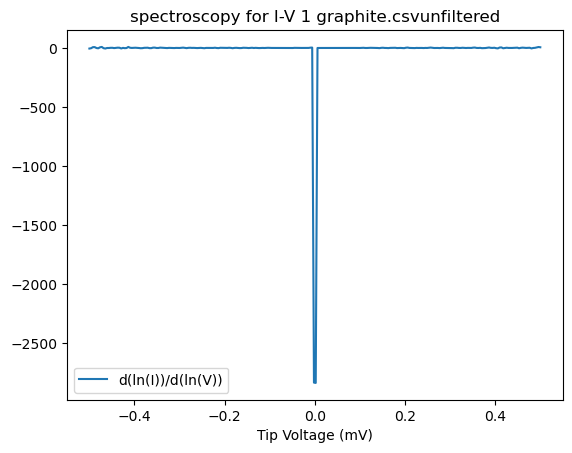

<Figure size 1000x600 with 0 Axes>

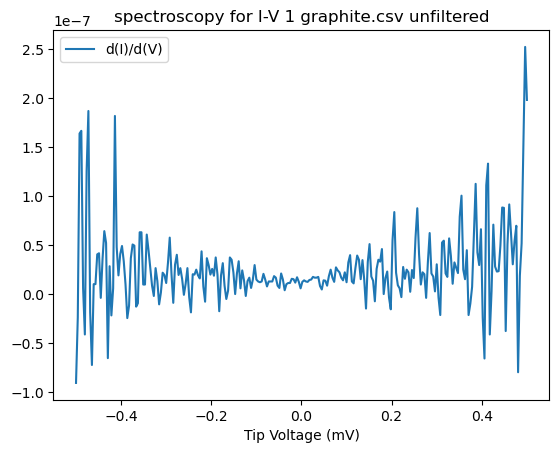

In [15]:
file_name = "spectroscopy for I-V 1 graphite.csv"

# Load the data
spectroscopy = pd.read_csv(f"Worthwhile Scans\\Spectroscopy CSVs\\Graphite\\{file_name}",
                           names=["Tip Voltage (mV)", "Current (nA)"],
                           sep=";")

# Plot the current vs voltage with an increased figure size
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
spectroscopy.plot("Tip Voltage (mV)", "Current (nA)")
plt.title("Current vs Tip Voltage")
plt.show()

# Calculate the logs and gradient
log_current = np.log(np.abs(spectroscopy["Current (nA)"].to_numpy()))
log_voltage = np.log(np.abs(spectroscopy["Tip Voltage (mV)"].to_numpy()))
spectroscopy["d(ln(I))/d(ln(V))"] = np.gradient(log_current, log_voltage)
spectroscopy["d(I)/d(V)"] = np.gradient(spectroscopy["Current (nA)"], spectroscopy["Tip Voltage (mV)"])

# Plot the derivative with an increased figure size
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
spectroscopy.plot("Tip Voltage (mV)", "d(ln(I))/d(ln(V))")
plt.title(file_name + "unfiltered")
#plt.xlim(-0.01, 0.01)  # Uncomment if needed
plt.show()

# Plot the derivative with an increased figure size
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
spectroscopy.plot("Tip Voltage (mV)", "d(I)/d(V)")
plt.title(file_name + " unfiltered")
#plt.xlim(-0.01, 0.01)  # Uncomment if needed
plt.show()


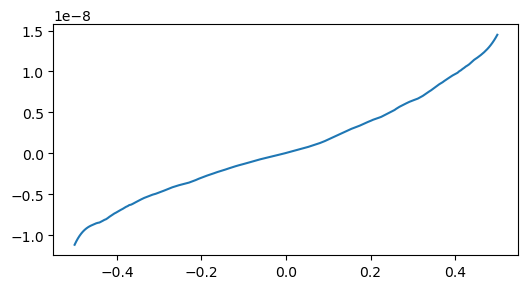

<Figure size 1000x600 with 0 Axes>

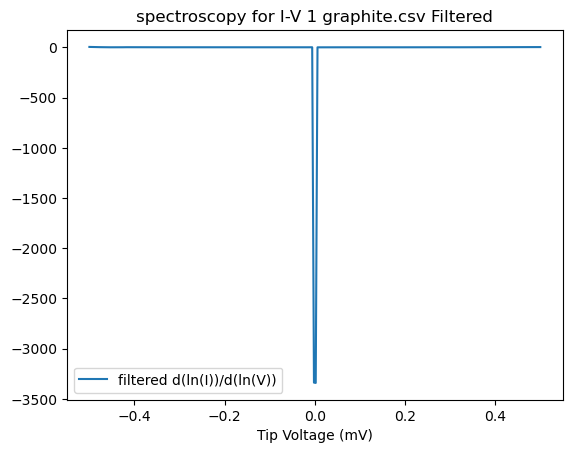

<Figure size 1000x600 with 0 Axes>

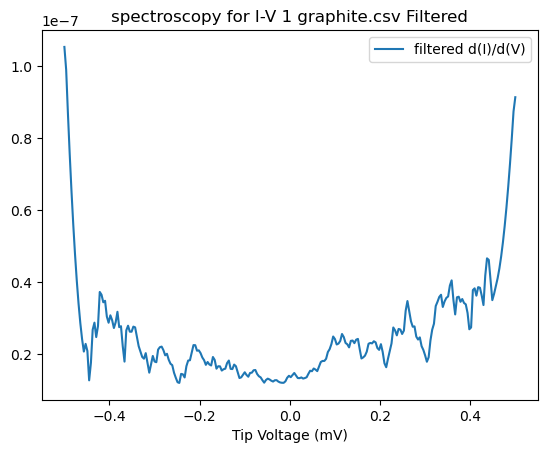

In [16]:
spectroscopy_filtered = savgol_filter(spectroscopy["Current (nA)"], window_length = 25, polyorder = 3, mode = 'interp')
plt.figure(figsize=(6, 3))  # Set figure size (width, height)
plt.plot(spectroscopy["Tip Voltage (mV)"], spectroscopy_filtered)
plt.show()

# Calculate the logs and gradient
log_current = np.log(np.abs(spectroscopy_filtered))
log_voltage = np.log(np.abs(spectroscopy["Tip Voltage (mV)"]))

spectroscopy["filtered d(ln(I))/d(ln(V))"] = np.gradient(log_current, log_voltage)
spectroscopy["filtered d(I)/d(V)"] = np.gradient(spectroscopy_filtered, spectroscopy["Tip Voltage (mV)"])

# Plot the derivative with an increased figure size
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
spectroscopy.plot("Tip Voltage (mV)", "filtered d(ln(I))/d(ln(V))")
plt.title(file_name + " Filtered")
#plt.xlim(-0.01, 0.01)  # Uncomment if needed
plt.show()

plt.figure(figsize=(10, 6))  # Set figure size (width, height)
spectroscopy.plot("Tip Voltage (mV)", "filtered d(I)/d(V)")
plt.title(file_name + " Filtered")
#plt.xlim(-0.01, 0.01)  # Uncomment if needed
plt.show()

Here you can visually see the maxima

### Noteworthy rows

Derivative around Tip Voltage = _approx 0_

In [17]:
display(spectroscopy[123:133])

,Tip Voltage (mV),Current (nA),d(ln(I))/d(ln(V)),d(I)/d(V),filtered d(ln(I))/d(ln(V)),filtered d(I)/d(V)
123,-0.017648,-1.831054e-10,1.480273,1.556398e-08,1.134003,1.210539e-08
124,-0.013726,-1.342773e-10,1.236265,1.206208e-08,1.177598,1.209412e-08
125,-0.009804,-8.850088e-11,3.364910,1.750948e-08,1.337403,1.251562e-08
126,-0.005883,3.051851e-12,4.099196,1.284028e-08,1.397997,1.350480e-08
127,-0.001961,1.220712e-11,-2835.765663,6.225592e-09,-3338.500237,1.404653e-08
128,0.001960,5.187998e-11,-2838.399481,1.284028e-08,-3341.602072,1.366495e-08
129,0.005882,1.129151e-10,0.729816,1.439668e-08,0.705552,1.424029e-08
130,0.009803,1.647950e-10,0.784271,1.322938e-08,0.810514,1.482811e-08
131,0.013725,2.166749e-10,0.810669,1.284028e-08,0.818760,1.410397e-08
132,0.017647,2.655030e-10,0.983653,1.478578e-08,0.817394,1.341457e-08


## Trying to improve results

#### Taking means from multiple spectroscopy runs

In [18]:
#Initialising each variable
file_prefix = "I-V spectroscopy"
materials = ["Graphite", "Gold", "Silicon"]

#dictionary to hold material, mean current data frame pairs
mean_dfs = {}

#iterating over each material
for material in materials:
    #setting up data frame to hold each current value
    volt_column = False
    grand_df = pd.DataFrame({})

    #looping over 16 csv w/ the naming convention
    for i in range(1, 17):
        #storing raw spectroscopy data in data frame
        spectroscopy = pd.read_csv(f"Worthwhile Scans\\week 5\\Spectroscopy {material}\\{file_prefix} {i}.csv",
                               names=["Tip Voltage (mV)", "Current (nA)"],
                               sep=";")

        #if statement set up to only write voltage column once
        if volt_column == False:
            grand_df["Tip Voltage (mV)"] = spectroscopy["Tip Voltage (mV)"]
            volt_column = True

        #Writing current to big data frame
        grand_df[f"Current (nA) {i}"] = spectroscopy["Current (nA)"]

        #calculate mean current of all 16 current
        mean_df = pd.DataFrame({"Tip Voltage (mV)":grand_df["Tip Voltage (mV)"],
                           "Mean Current (nA)":grand_df.iloc[:, 1:].mean(axis=1)})
        mean_df.to_csv(f"I-V mean spectroscopy {material}.csv", index=False)

        #write data frame of voltage and current to dictionary
        mean_dfs[material] = mean_df

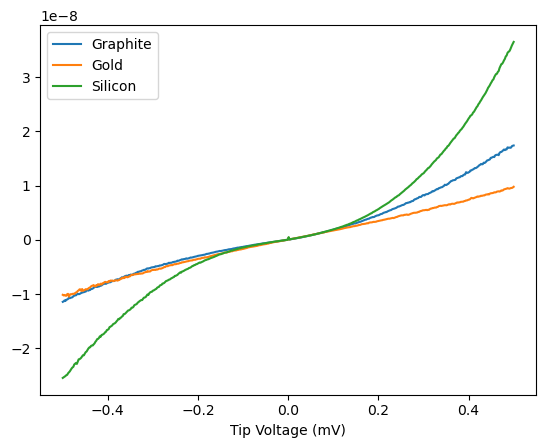

In [19]:
fig, ax = plt.subplots()
for mat, dfs in mean_dfs.items():
    dfs.plot("Tip Voltage (mV)", "Mean Current (nA)", ax = ax, label = mat)

### Running the data through a filter

The filter chosen was the _Savitzky-Golay_ filter due to its nature in fitting a polynomial to the data while being able to maintain the nuances of it. It also has various parameters that can be played around with to obtain more desirable results.

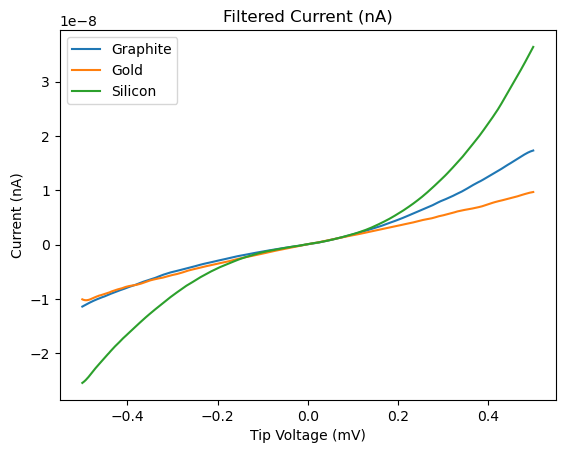

In [20]:
fig, ax = plt.subplots()
for mat, dfs in mean_dfs.items():
    spectroscopy_filtered = savgol_filter(dfs["Mean Current (nA)"], window_length = 25, polyorder = 3, mode = 'interp')
    ax.plot(dfs["Tip Voltage (mV)"], spectroscopy_filtered, label = mat)
    dfs["Filtered Current (nA)"] = spectroscopy_filtered
    dfs.to_csv(f"I-V mean and filter spectroscopy {mat}.csv", index=False)
ax.set_xlabel("Tip Voltage (mV)")
ax.set_ylabel("Current (nA)")
ax.set_title("Filtered Current (nA)")
plt.legend()

### Making all the plots.

c:\Users\Nate\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


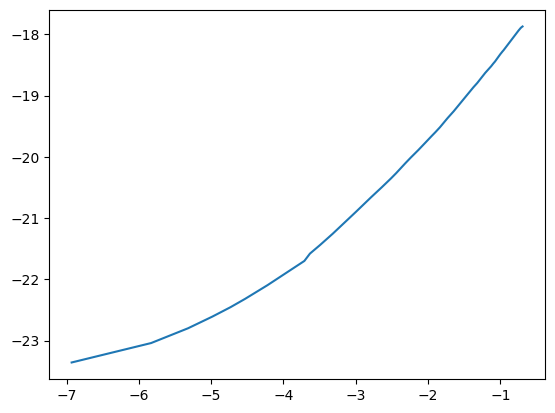

<Figure size 1000x600 with 0 Axes>

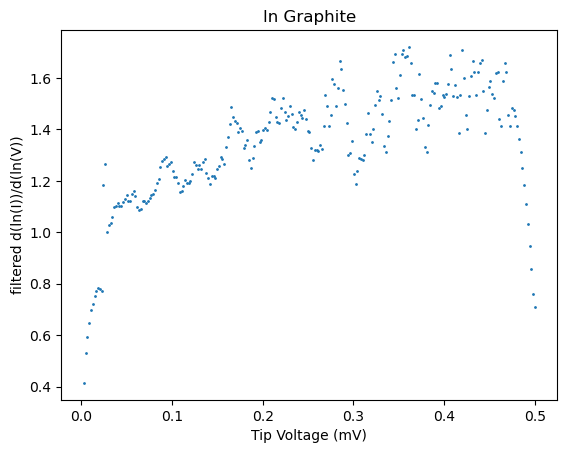

<Figure size 1000x600 with 0 Axes>

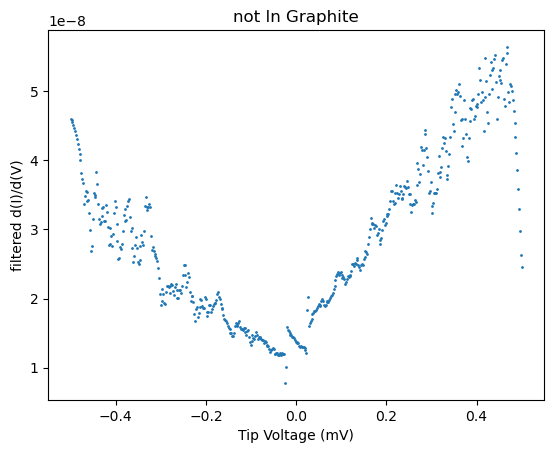

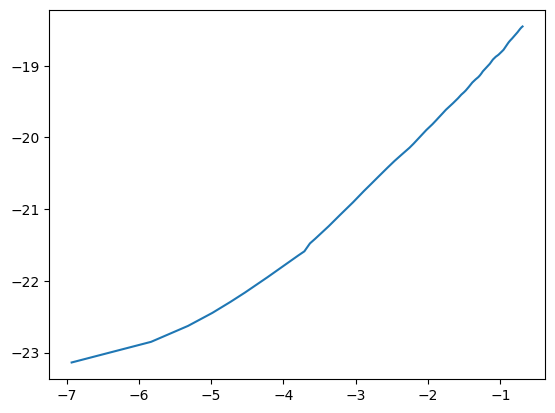

<Figure size 1000x600 with 0 Axes>

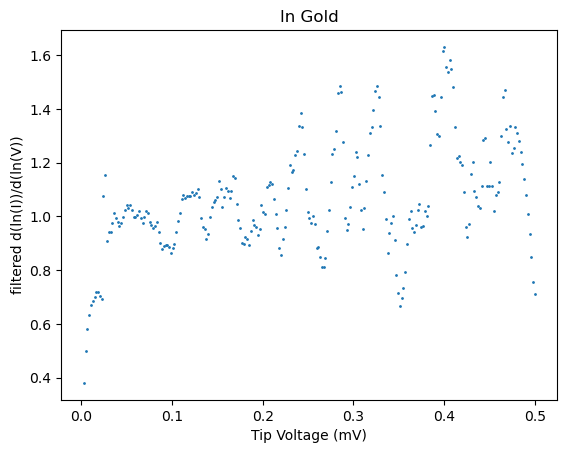

<Figure size 1000x600 with 0 Axes>

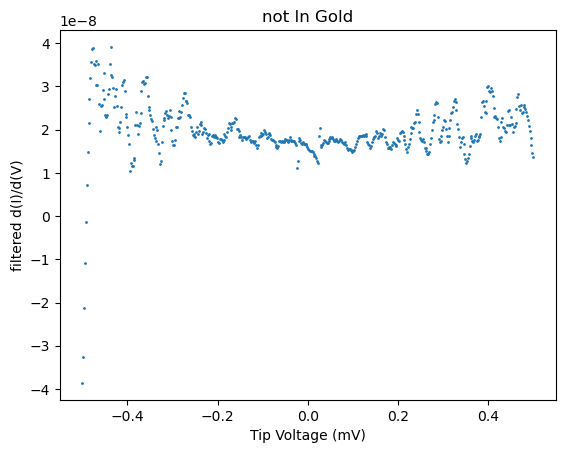

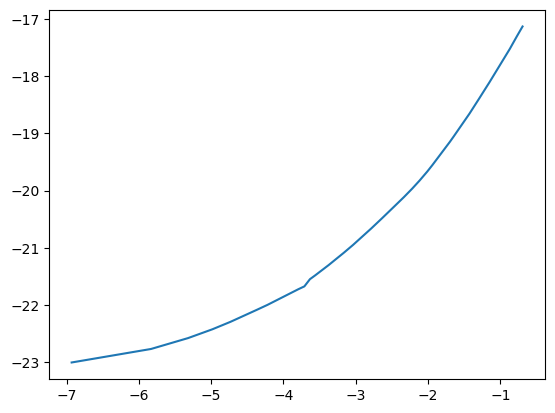

<Figure size 1000x600 with 0 Axes>

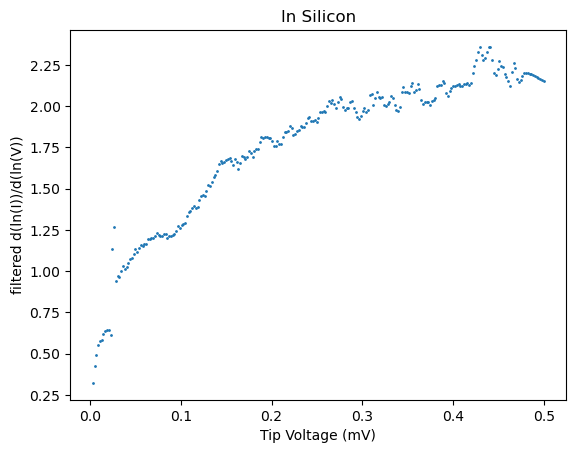

<Figure size 1000x600 with 0 Axes>

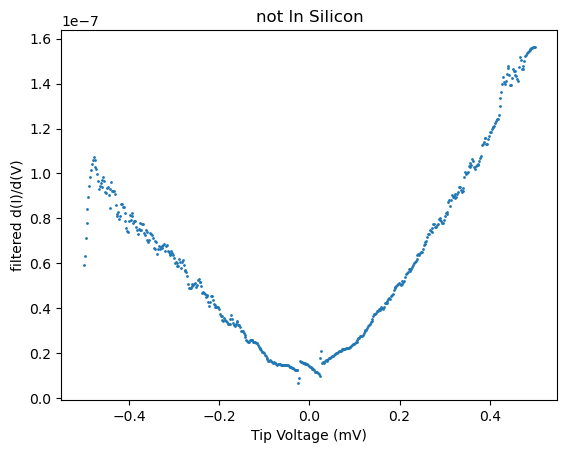

In [28]:
for mat, dfs in mean_dfs.items():
    # Calculate the logs and gradient
    log_current = np.log((dfs["Filtered Current (nA)"])) * np.sign(dfs["Filtered Current (nA)"])
    log_voltage = np.log((dfs["Tip Voltage (mV)"])) * np.sign(dfs["Tip Voltage (mV)"])
    dfs["filtered d(ln(I))/d(ln(V))"] = np.gradient(log_current, log_voltage)
    dfs["filtered d(I)/d(V)"] = np.gradient(dfs["Filtered Current (nA)"], dfs["Tip Voltage (mV)"])

    # Plot the derivative with an increased figure size
    plt.figure(figsize=(10, 6))  # Set figure size (width, height)
    dfs.plot("Tip Voltage (mV)", "filtered d(ln(I))/d(ln(V))", kind = "scatter", s = 1)
    plt.title(f"ln {mat}")
    plt.show()

    #plot the derivative without natural logs with an increased figure size
    plt.figure(figsize=(10, 6))  # Set figure size (width, height)
    dfs.plot("Tip Voltage (mV)", "filtered d(I)/d(V)", kind = "scatter", s = 1)
    plt.title(f"not ln {mat}")
    plt.show()